In [1]:
# https://www.python-course.eu/neural_network_mnist.php

In [33]:
import os 
os.getcwd()
os.chdir("/home/mumin/Image-Processing/4.hafta")
os.listdir()

['Hafta 4.ipynb',
 'iki.jpg',
 '.ipynb_checkpoints',
 'hangi-sayi-fonksiyonu.ipynb']

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [35]:
data_path="/home/mumin/mnist"
train_data = np.loadtxt(data_path + "/mnist_train.csv", delimiter=",")
test_data = np.loadtxt(data_path + "/mnist_test.csv", delimiter=",")

In [36]:
image_size = 28
image_pixels = image_size * image_size

test_data[:10]

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [37]:
train_data.ndim, train_data.shape
train_data[10,0]

3.0

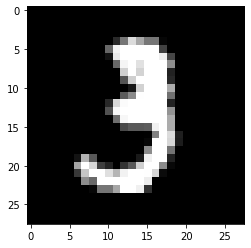

In [38]:
im_3=train_data[10,:]
im_3.shape
im_4=im_3[1:]
im_4.shape
im_5=im_4.reshape(28,28)
plt.imshow(im_5,cmap='gray')
plt.show()

In [39]:
m,n=train_data.shape
m,n

(60000, 785)

In [40]:
s=0
for i in range(m):
    if (train_data[i,0]==3):
        s=s+1
        
s

6131

In [41]:
def my_counter(k=0):
    s=0
    for i in range(m):
        if (train_data[i,0]==k):
            s=s+1
    return s
for i in range(10):
    c=my_counter(i)
    print(i," ",c)

0   5923
1   6742
2   5958
3   6131
4   5842
5   5421
6   5918
7   6265
8   5851
9   5949


In [42]:
m,n=train_data.shape 
m,n

(60000, 785)

In [43]:
import math
def my_pdf_1(x, mu=0.0, sigma=1.0):
    x = float(x - mu) / sigma
    return math.exp(-x*x/2.0) / math.sqrt(2.0*math.pi) / sigma
my_pdf_1(10,1,3)

0.001477282803979336

In [44]:
for i in range(m):
    digit_class=train_data[i,0]
    top_left=train_data[i,1]
    bottom_right=train_data[i,784]
    print(digit_class,end=" ")
    print(top_left,end=" ")
    print(bottom_right,end=" ")

5.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 6.0 

 1.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 2.0

0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 

 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 4.0

 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0

1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 8.0 

2.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 1.0 

0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 

 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0

 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0

 3.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0

0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 

 1.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 9.0

 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0

 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0

8.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 6.0 

9.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 

0.0 8.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 

 5.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 0.0

0.0 4.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 

0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 

4.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 9.0 

 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0

 0.0 7.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0

 0.0 1.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0

0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 

1.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 

0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 

 0.0 5.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0

0.0 2.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 

 0.0 7.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0

0.0 4.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 

0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 

 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0

 8.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0

 0.0 5.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0

 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0

0.0 1.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 

 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0

0.0 2.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 

0.0 8.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 

0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 

9.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 5.0 

1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 

 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0

 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0

 0.0 4.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0

 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0

 0.0 5.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0

0.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 

0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 

0.0 3.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 

0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 

2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 6.0 

 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

 1.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 2.0

0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 

0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 

 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0

0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 

0.0 2.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 

In [45]:
s=0
k=0
t=0
l=350
for i in range(m):
    if(train_data[i,0]==k):
        s=s+1
        t=t+train_data[i,l+1]
mean_1=t/s

s,t=0,0
for i in range(m):
    if(train_data[i,0]==k):
        s=s+1
        diff_1=train_data[i,l+1]-mean_1
        t=t+diff_1*diff_1
std_1=np.sqrt(t/(s-1))
print(mean_1,std_1)

22.705723450953908 61.8672005389669


In [46]:
def get_my_mean_and_std(k=0,l=0):
    s=0
    t=0
    for i in range(m):
        if(train_data[i,0]==k):
            s=s+1
            t=t+train_data[i,l+1]
    mean_1=t/s

    s,t=0,0
    for i in range(m):                 
        if(train_data[i,0]==k):
            s=s+1
            diff_1=train_data[i,l+1]-mean_1
            t=t + diff_1*diff_1
    std_1=np.sqrt(t/(s-1))

    print(mean_1,std_1)
    return mean_1,std_1

In [47]:
get_my_mean_and_std(2,100)

35.8611950318899 76.89200060020755


(35.8611950318899, 76.89200060020755)

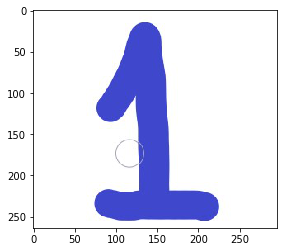

In [48]:
im_1=plt.imread('iki.jpg')
plt.imshow(im_1)
plt.show()
test_value=im_1[0,0,0]

In [49]:
m_1,std_1=get_my_mean_and_std(2,100)
my_pdf_1(test_value,m_1,std_1)

35.8611950318899 76.89200060020755


8.939333047950803e-05

In [50]:
# ödev resim oluşturup hangi sayı olduğunu bul, bütün classlarda mean ve pdf bul

In [51]:
def pdf_of_class(x, i, k):
    mu,sigma = means_and_stds[k][0][i], means_and_stds[k][1][i]
    if sigma==0:
        return 1
    a = float(x-mu)/sigma
    return math.exp(-a*a/2.0) / (math.sqrt(2.0*math.pi) * sigma)

In [52]:
def predict(im_1):
    max_value, max_class = 0,0
    for k in range(10):
        p = 1.0
        for i in range(784):
            p_new = pdf_of_class(im_1[i],i,k)
            p*=p_new**0.17
        if p > max_value:
            max_value = p
            max_class = k
    return max_class,max_value

NameError: name 'means_and_stds' is not defined

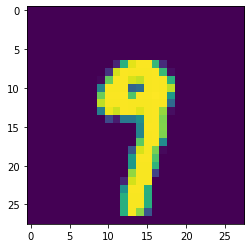

In [53]:
test_image = test_data[np.random.randint(0,len(test_data))][1:]
plt.imshow(test_image.reshape((28,28)))
print(predict(test_image))


In [ ]:
import tqdm
success = 0
for i in tqdm.tqdm(range(len(test_data))):
    test_image = test_data[i]
    predicted = predict(test_image[1:])[0]
    if predicted == test_image[0]:
        success+=1
print(success / len(test_data))